In [1]:
import numpy as np
import matplotlib.pyplot as plt
def get(path, mode, M):

    loss_train, acc_train, loss_val, acc_val = [], [], [], []
    lossTGCN, accTGCN, lossVGCN, accVGCN = [], [], [], []

    with open(path + '{}.log'.format(mode), 'r') as infile:
        for i in infile:
            try:
                a, b, c, d = list(map(float, i.split('-')))
                loss_train.append(a)
                acc_train.append(b)
                loss_val.append(c)
                acc_val.append(d)
            except:
                continue
        accTGCN = acc_train
        accVGCN = acc_val
        lossTGCN = loss_train
        lossVGCN = loss_val
        
    return accTGCN[:M], accVGCN[:M], lossTGCN[:M], lossVGCN[:M]

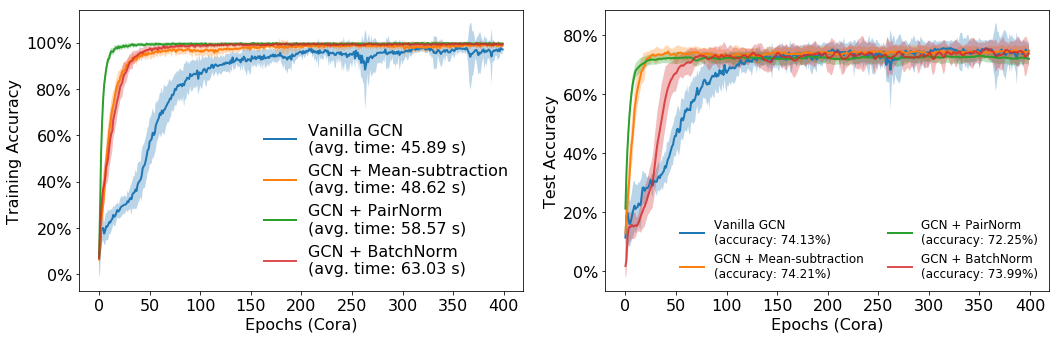

In [31]:
DataSet = 'cora'

N, M = 20, 400

accTGCN, accVGCN, lossTGCN, lossVGCN = get(DataSet + '/output_0_', '0', M)
accTGCN = np.array(accTGCN)
accVGCN = np.array(accVGCN)
lossTGCN = np.array(lossTGCN)
lossVGCN = np.array(lossVGCN)

accTGCN2, accVGCN2, lossTGCN2, lossVGCN2 = get(DataSet + '/output_1_', '0', M)
accTGCN2 = np.array(accTGCN2)
accVGCN2 = np.array(accVGCN2)
lossTGCN2 = np.array(lossTGCN2)
lossVGCN2 = np.array(lossVGCN2)

accTGCN3, accVGCN3, lossTGCN3, lossVGCN3 = get(DataSet +'/output_2_', '0', M)
accTGCN3 = np.array(accTGCN3)
accVGCN3 = np.array(accVGCN3)
lossTGCN3 = np.array(lossTGCN3)
lossVGCN3 = np.array(lossVGCN3)

accTGCN4, accVGCN4, lossTGCN4, lossVGCN4 = get(DataSet + '/output_3_', '0', M)
accTGCN4 = np.array(accTGCN4)
accVGCN4 = np.array(accVGCN4)
lossTGCN4 = np.array(lossTGCN4)
lossVGCN4 = np.array(lossVGCN4)

for i in np.arange(1, N, 1):
    a, b, c, d = get(DataSet + '/output_0_', str(i), M)
    accTGCN = np.vstack([accTGCN, np.array(a)])
    accVGCN = np.vstack([accVGCN, np.array(b)])
    
for i in np.arange(1, N, 1):
    a, b, c, d = get(DataSet + '/output_1_', str(i), M)
    accTGCN2 = np.vstack([accTGCN2, np.array(a)])
    accVGCN2 = np.vstack([accVGCN2, np.array(b)])

for i in np.arange(1, N, 1):
    a, b, c, d = get(DataSet + '/output_2_', str(i), M)
    accTGCN3 = np.vstack([accTGCN3, np.array(a)])
    accVGCN3 = np.vstack([accVGCN3, np.array(b)])

for i in np.arange(1, N, 1):
    a, b, c, d = get(DataSet + '/output_3_', str(i), M)
    accTGCN4 = np.vstack([accTGCN4, np.array(a)])
    accVGCN4 = np.vstack([accVGCN4, np.array(b)])
    

accTGCN_mean = accTGCN.mean(axis=0)
accTGCN_std = accTGCN.std(axis=0)

accVGCN_mean = accVGCN.mean(axis=0)
accVGCN_std = accVGCN.std(axis=0)

accTGCN_mean2 = accTGCN2.mean(axis=0)
accTGCN_std2 = accTGCN2.std(axis=0)

accVGCN_mean2 = accVGCN2.mean(axis=0)
accVGCN_std2 = accVGCN2.std(axis=0)

accTGCN_mean3 = accTGCN3.mean(axis=0)
accTGCN_std3 = accTGCN3.std(axis=0)

accVGCN_mean3 = accVGCN3.mean(axis=0)
accVGCN_std3 = accVGCN3.std(axis=0)

accTGCN_mean4 = accTGCN4.mean(axis=0)
accTGCN_std4 = accTGCN4.std(axis=0)

accVGCN_mean4 = accVGCN4.mean(axis=0)
accVGCN_std4 = accVGCN4.std(axis=0)



import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'

plt.rc('font', size=16)
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'

plt.figure(figsize=(15, 5))
plt.subplot(121)

plt.plot(accTGCN_mean, lw=2)
plt.fill_between(np.arange(M), accTGCN_mean - accTGCN_std, accTGCN_mean + accTGCN_std, alpha = 0.3)
plt.plot(accTGCN_mean2, lw=2)
plt.fill_between(np.arange(M), accTGCN_mean2 - accTGCN_std2, accTGCN_mean2 + accTGCN_std2, alpha = 0.3)
plt.plot(accTGCN_mean3, lw=2)
plt.fill_between(np.arange(M), accTGCN_mean3 - accTGCN_std3, accTGCN_mean3 + accTGCN_std3, alpha = 0.3)
plt.plot(accTGCN_mean4, alpha=0.8, lw=2)
plt.fill_between(np.arange(M), accTGCN_mean4 - accTGCN_std4, accTGCN_mean4 + accTGCN_std4, alpha = 0.3)

# plt.ylim([0.05, 1.1])

plt.legend(['Vanilla GCN\n(avg. time: 45.89 s) ', 'GCN + Mean-subtraction\n(avg. time: 48.62 s)', \
            'GCN + PairNorm\n(avg. time: 58.57 s)', 'GCN + BatchNorm\n(avg. time: 63.03 s)'], frameon=False)
plt.ylabel('Training Accuracy')
plt.xlabel('Epochs (Cora)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

locs, labels = plt.xticks()  # Get the current locations and labels.
# plt.xticks(np.arange(11), [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])  # Set text labels.

plt.subplot(122)

plt.plot(accVGCN_mean, lw=2)
plt.fill_between(np.arange(M), accVGCN_mean - accVGCN_std, accVGCN_mean + accVGCN_std, alpha = 0.3)
plt.plot(accVGCN_mean2, lw=2)
plt.fill_between(np.arange(M), accVGCN_mean2 - accVGCN_std2, accVGCN_mean2 + accVGCN_std2, alpha = 0.3)
plt.plot(accVGCN_mean3, lw=2)
plt.fill_between(np.arange(M), accVGCN_mean3 - accVGCN_std3, accVGCN_mean3 + accVGCN_std3, alpha = 0.3)
plt.plot(accVGCN_mean4, alpha=0.8, lw=2)
plt.fill_between(np.arange(M), accVGCN_mean4 - accVGCN_std4, accVGCN_mean4 + accVGCN_std4, alpha = 0.3)

# plt.ylim([-0.2, 0.85])

plt.legend(['Vanilla GCN\n(accuracy: 74.13%)', \
            'GCN + Mean-subtraction\n(accuracy: 74.21%)', \
            'GCN + PairNorm\n(accuracy: 72.25%)', \
            'GCN + BatchNorm\n(accuracy: 73.99%)'], ncol=2, frameon=False, fontsize=12)
plt.ylabel('Test Accuracy')
plt.xlabel('Epochs (Cora)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))


plt.tight_layout()
plt.savefig('mean2.pdf')
# plt.show()

In [10]:
np.mean(accVGCN_mean4[-50:])

0.739941891891892

In [11]:
np.mean(accVGCN_mean3[-50:])

0.72252972972973

In [12]:
np.mean(accVGCN_mean2[-50:])

0.7421641891891891

In [13]:
np.mean(accVGCN_mean[-50:])

0.7413695945945945

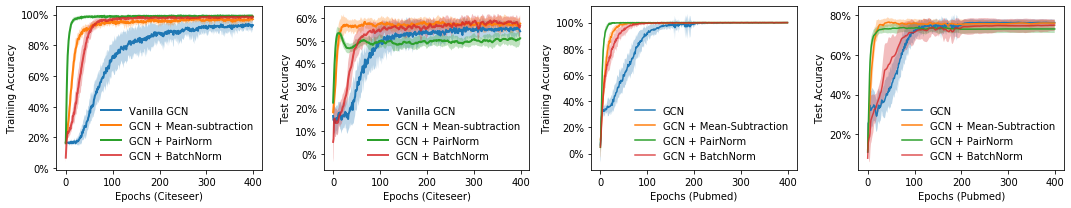

In [17]:
DataSet = 'citeseer'

N, M = 20, 400

accTGCN, accVGCN, lossTGCN, lossVGCN = get(DataSet + '/output_0_', '0', M)
accTGCN = np.array(accTGCN)
accVGCN = np.array(accVGCN)
lossTGCN = np.array(lossTGCN)
lossVGCN = np.array(lossVGCN)

accTGCN2, accVGCN2, lossTGCN2, lossVGCN2 = get(DataSet + '/output_1_', '0', M)
accTGCN2 = np.array(accTGCN2)
accVGCN2 = np.array(accVGCN2)
lossTGCN2 = np.array(lossTGCN2)
lossVGCN2 = np.array(lossVGCN2)

accTGCN3, accVGCN3, lossTGCN3, lossVGCN3 = get(DataSet +'/output_2_', '0', M)
accTGCN3 = np.array(accTGCN3)
accVGCN3 = np.array(accVGCN3)
lossTGCN3 = np.array(lossTGCN3)
lossVGCN3 = np.array(lossVGCN3)

accTGCN4, accVGCN4, lossTGCN4, lossVGCN4 = get(DataSet + '/output_3_', '0', M)
accTGCN4 = np.array(accTGCN4)
accVGCN4 = np.array(accVGCN4)
lossTGCN4 = np.array(lossTGCN4)
lossVGCN4 = np.array(lossVGCN4)


for i in np.arange(1, N, 1):
    a, b, c, d = get(DataSet + '/output_0_', str(i), M)
    accTGCN = np.vstack([accTGCN, np.array(a)])
    accVGCN = np.vstack([accVGCN, np.array(b)])
    
for i in np.arange(1, N, 1):
    a, b, c, d = get(DataSet + '/output_1_', str(i), M)
    accTGCN2 = np.vstack([accTGCN2, np.array(a)])
    accVGCN2 = np.vstack([accVGCN2, np.array(b)])

for i in np.arange(1, N, 1):
    a, b, c, d = get(DataSet + '/output_2_', str(i), M)
    accTGCN3 = np.vstack([accTGCN3, np.array(a)])
    accVGCN3 = np.vstack([accVGCN3, np.array(b)])
    
for i in np.arange(1, N, 1):
    a, b, c, d = get(DataSet + '/output_3_', str(i), M)
    accTGCN4 = np.vstack([accTGCN4, np.array(a)])
    accVGCN4 = np.vstack([accVGCN4, np.array(b)]) 

accTGCN_mean = accTGCN.mean(axis=0)
accTGCN_std = accTGCN.std(axis=0)

accVGCN_mean = accVGCN.mean(axis=0)
accVGCN_std = accVGCN.std(axis=0)

accTGCN_mean2 = accTGCN2.mean(axis=0)
accTGCN_std2 = accTGCN2.std(axis=0)

accVGCN_mean2 = accVGCN2.mean(axis=0)
accVGCN_std2 = accVGCN2.std(axis=0)

accTGCN_mean3 = accTGCN3.mean(axis=0)
accTGCN_std3 = accTGCN3.std(axis=0)

accVGCN_mean3 = accVGCN3.mean(axis=0)
accVGCN_std3 = accVGCN3.std(axis=0)

accTGCN_mean4 = accTGCN4.mean(axis=0)
accTGCN_std4 = accTGCN4.std(axis=0)

accVGCN_mean4 = accVGCN4.mean(axis=0)
accVGCN_std4 = accVGCN4.std(axis=0)



import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'

plt.rc('font', size=10)
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'

plt.figure(figsize=(15, 3))
plt.subplot(141)

plt.plot(accTGCN_mean, lw=2)
plt.fill_between(np.arange(M), accTGCN_mean - accTGCN_std, accTGCN_mean + accTGCN_std, alpha = 0.3)
plt.plot(accTGCN_mean2, lw=2)
plt.fill_between(np.arange(M), accTGCN_mean2 - accTGCN_std2, accTGCN_mean2 + accTGCN_std2, alpha = 0.3)
plt.plot(accTGCN_mean3, lw=2)
plt.fill_between(np.arange(M), accTGCN_mean3 - accTGCN_std3, accTGCN_mean3 + accTGCN_std3, alpha = 0.3)
plt.plot(accTGCN_mean4, alpha=0.8, lw=2)
plt.fill_between(np.arange(M), accTGCN_mean4 - accTGCN_std4, accTGCN_mean4 + accTGCN_std4, alpha = 0.3)

plt.legend(['Vanilla GCN', 'GCN + Mean-subtraction', \
            'GCN + PairNorm', 'GCN + BatchNorm'], frameon=False)
plt.ylabel('Training Accuracy')
plt.xlabel('Epochs (Citeseer)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

locs, labels = plt.xticks()  # Get the current locations and labels.
# plt.xticks(np.arange(11), [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])  # Set text labels.

plt.subplot(142)

plt.plot(accVGCN_mean, lw=2)
plt.fill_between(np.arange(M), accVGCN_mean - accVGCN_std, accVGCN_mean + accVGCN_std, alpha = 0.3)
plt.plot(accVGCN_mean2, lw=2)
plt.fill_between(np.arange(M), accVGCN_mean2 - accVGCN_std2, accVGCN_mean2 + accVGCN_std2, alpha = 0.3)
plt.plot(accVGCN_mean3, lw=2)
plt.fill_between(np.arange(M), accVGCN_mean3 - accVGCN_std3, accVGCN_mean3 + accVGCN_std3, alpha = 0.3)
plt.plot(accVGCN_mean4, alpha=0.8, lw=2)
plt.fill_between(np.arange(M), accVGCN_mean4 - accVGCN_std4, accVGCN_mean4 + accVGCN_std4, alpha = 0.3)


plt.legend(['Vanilla GCN', \
            'GCN + Mean-subtraction', \
            'GCN + PairNorm', \
            'GCN + BatchNorm'], frameon=False)
plt.ylabel('Test Accuracy')
plt.xlabel('Epochs (Citeseer)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))



DataSet = 'pubmed'

N, M = 20, 400

accTGCN, accVGCN, lossTGCN, lossVGCN = get(DataSet + '/output_0_', '0', M)
accTGCN = np.array(accTGCN)
accVGCN = np.array(accVGCN)
lossTGCN = np.array(lossTGCN)
lossVGCN = np.array(lossVGCN)

accTGCN2, accVGCN2, lossTGCN2, lossVGCN2 = get(DataSet + '/output_1_', '0', M)
accTGCN2 = np.array(accTGCN2)
accVGCN2 = np.array(accVGCN2)
lossTGCN2 = np.array(lossTGCN2)
lossVGCN2 = np.array(lossVGCN2)

accTGCN3, accVGCN3, lossTGCN3, lossVGCN3 = get(DataSet +'/output_2_', '0', M)
accTGCN3 = np.array(accTGCN3)
accVGCN3 = np.array(accVGCN3)
lossTGCN3 = np.array(lossTGCN3)
lossVGCN3 = np.array(lossVGCN3)

accTGCN4, accVGCN4, lossTGCN4, lossVGCN4 = get(DataSet + '/output_3_', '0', M)
accTGCN4 = np.array(accTGCN4)
accVGCN4 = np.array(accVGCN4)
lossTGCN4 = np.array(lossTGCN4)
lossVGCN4 = np.array(lossVGCN4)


for i in np.arange(1, N, 1):
    a, b, c, d = get(DataSet + '/output_0_', str(i), M)
    accTGCN = np.vstack([accTGCN, np.array(a)])
    accVGCN = np.vstack([accVGCN, np.array(b)])

for i in np.arange(1, N, 1):
    a, b, c, d = get(DataSet + '/output_1_', str(i), M)
    accTGCN2 = np.vstack([accTGCN2, np.array(a)])
    accVGCN2 = np.vstack([accVGCN2, np.array(b)])

for i in np.arange(1, N, 1):
    a, b, c, d = get(DataSet + '/output_2_', str(i), M)
    accTGCN3 = np.vstack([accTGCN3, np.array(a)])
    accVGCN3 = np.vstack([accVGCN3, np.array(b)])

for i in np.arange(1, N, 1):
    a, b, c, d = get(DataSet + '/output_3_', str(i), M)
    accTGCN4 = np.vstack([accTGCN4, np.array(a)])
    accVGCN4 = np.vstack([accVGCN4, np.array(b)])    

accTGCN_mean = accTGCN.mean(axis=0)
accTGCN_std = accTGCN.std(axis=0)

accVGCN_mean = accVGCN.mean(axis=0)
accVGCN_std = accVGCN.std(axis=0)


accTGCN_mean2 = accTGCN2.mean(axis=0)
accTGCN_std2 = accTGCN2.std(axis=0)


accVGCN_mean2 = accVGCN2.mean(axis=0)
accVGCN_std2 = accVGCN2.std(axis=0)


accTGCN3 = accTGCN3[:, :M]
accVGCN3 = accVGCN3[:, :M]

accTGCN_mean3 = accTGCN3.mean(axis=0)
accTGCN_std3 = accTGCN3.std(axis=0)

accVGCN_mean3 = accVGCN3.mean(axis=0)
accVGCN_std3 = accVGCN3.std(axis=0)


accTGCN_mean4 = accTGCN4.mean(axis=0)
accTGCN_std4 = accTGCN4.std(axis=0)

accVGCN_mean4 = accVGCN4.mean(axis=0)
accVGCN_std4 = accVGCN4.std(axis=0)


plt.subplot(143)

plt.plot(accTGCN_mean)
plt.fill_between(np.arange(M), accTGCN_mean - accTGCN_std, accTGCN_mean + accTGCN_std, alpha = 0.3)
plt.plot(accTGCN_mean2)
plt.fill_between(np.arange(M), accTGCN_mean2 - accTGCN_std2, accTGCN_mean2 + accTGCN_std2, alpha = 0.3)
plt.plot(accTGCN_mean3)
plt.fill_between(np.arange(M), accTGCN_mean3 - accTGCN_std3, accTGCN_mean3 + accTGCN_std3, alpha = 0.3)
plt.plot(accTGCN_mean4, alpha=0.8)
plt.fill_between(np.arange(M), accTGCN_mean4 - accTGCN_std4, accTGCN_mean4 + accTGCN_std4, alpha = 0.3)

plt.legend(['GCN', 'GCN + Mean-Subtraction', 'GCN + PairNorm', 'GCN + BatchNorm'], fontsize=10, frameon=False)
plt.ylabel('Training Accuracy')
plt.xlabel('Epochs (Pubmed)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

locs, labels = plt.xticks()  # Get the current locations and labels.
# plt.xticks(np.arange(11), [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])  # Set text labels.

plt.subplot(144)

plt.plot(accVGCN_mean)
plt.fill_between(np.arange(M), accVGCN_mean - accVGCN_std, accVGCN_mean + accVGCN_std, alpha = 0.3)
plt.plot(accVGCN_mean2)
plt.fill_between(np.arange(M), accVGCN_mean2 - accVGCN_std2, accVGCN_mean2 + accVGCN_std2, alpha = 0.3)
plt.plot(accVGCN_mean3)
plt.fill_between(np.arange(M), accVGCN_mean3 - accVGCN_std3, accVGCN_mean3 + accVGCN_std3, alpha = 0.3)
plt.plot(accVGCN_mean4, alpha=0.8)
plt.fill_between(np.arange(M), accVGCN_mean4 - accVGCN_std4, accVGCN_mean4 + accVGCN_std4, alpha = 0.3)


plt.legend(['GCN', 'GCN + Mean-Subtraction', 'GCN + PairNorm', 'GCN + BatchNorm'], fontsize=10, frameon=False)
plt.ylabel('Test Accuracy')
plt.xlabel('Epochs (Pubmed)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))


plt.tight_layout()
plt.savefig('mean-citeseer-pubmed.pdf')
# plt.show()